# Proyek Analisis Data: Bike Sharing Dataset  
- **Nama:**  Anindya Fitri Syahra
- **Email:** anindya@mhs.usk.ac.id
- **ID Dicoding:** anindya06

## Menentukan Pertanyaan Bisnis
- Bagaimana dampak suhu terhadap tingkat penyewaan sepeda?

- Apakah ada perbedaan dalam preferensi penyewaan sepeda dipagi hari dibandingkan sore atau malam hari?

- Bagaimana tingkat penggunaan sepeda pada hari libur dan hari kerja?

## Import Semua Packages/Library yang digunakan

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling
### Gathering Data

In [2]:
#mengakses file hour.csv

hour_df = pd.read_csv('/kaggle/input/project-bike/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data


In [3]:
#Memeriksa tipe data dari tiap kolom 
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Note: Semua tipe data sudah sesuai dan tidak ada data yang kosong/hilang

In [4]:
#Memeriksa nilai duplikat
print("Jumlah nilai duplikat:",hour_df.duplicated().sum())

Jumlah nilai duplikat: 0


#### Note: Tidak terdapat nilai duplikat pada dataset

In [5]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Merubah nama kolom
hour_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "hr" : "hour",
    "mnth" : "month",
    "temp" : "temperature",
    "cnt" : "total_count"}, inplace=True)

In [7]:
# Merubah nilai dari 'temp' dan 'atemp' ke dalam nilai yang belum dinormalisasi

hour_df['temperature'] = hour_df['temperature']*41
hour_df['atemp'] = hour_df['atemp']*50

### Cleaning Data

In [8]:
# Menghapus kolom yang tidak digunakan dalam data
hour_df = hour_df.drop("instant", axis=1)
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hum,windspeed,casual,registered,total_count
0,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [9]:
#Menampilkan deskripsi data
hour_df.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,hum,windspeed,casual,registered,total_count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,0.780000,0.253700,48.000000,220.000000,281.000000


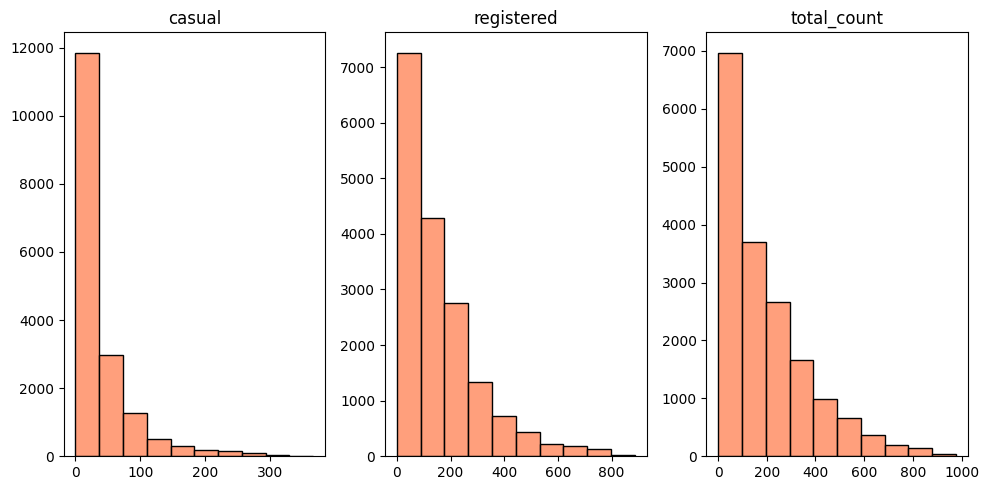

In [21]:
#Membuat histogram untuk jumlah penyewa sepeda
columns = ['casual', 'registered', 'total_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=hour_df[columns[i]], ax=ax, bins=10, color='coral')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [12]:
#Melihat rata-rata jumlah pengguna sepeda pada tiap jam
hour_df.groupby('hour')['total_count'].mean().reset_index()

,hour,total_count
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [13]:
#Melihat rata-rata jumlah pengguna sepeda pada suhu tertentu
hour_df.groupby('temperature')['total_count'].mean().reset_index()

,temperature,total_count
0,0.82,41.882353
1,1.64,35.625000
2,2.46,42.000000
3,3.28,28.235294
4,4.10,49.294118
5,4.92,58.421053
6,5.74,55.108696
7,6.56,65.578261
8,7.38,60.116129
9,8.20,79.745763


In [14]:
#Melihat rata-rata jumlah pengguna sepeda pada hari kerja dan hari libur
hour_df.groupby('workingday')['total_count'].mean().reset_index().sort_values("total_count")

,workingday,total_count
0,0,181.405332
1,1,193.207754


if day is neither weekend nor holiday is 1, otherwise is 0.

In [15]:
#Melihat jumlah penyewa sepeda dalam satu tahun (2011-2012)
hour_df.total_count.sum()

3292679

## Visualization & Explanatory Analysis

- Bagaimana dampak suhu terhadap tingkat penyewaan sepeda?

- Apakah ada perbedaan dalam preferensi penyewaan sepeda dipagi hari dibandingkan sore atau malam hari?

- Bagaimana tingkat penggunaan sepeda pada hari libur dan hari kerja?

### Pertanyaan 1:

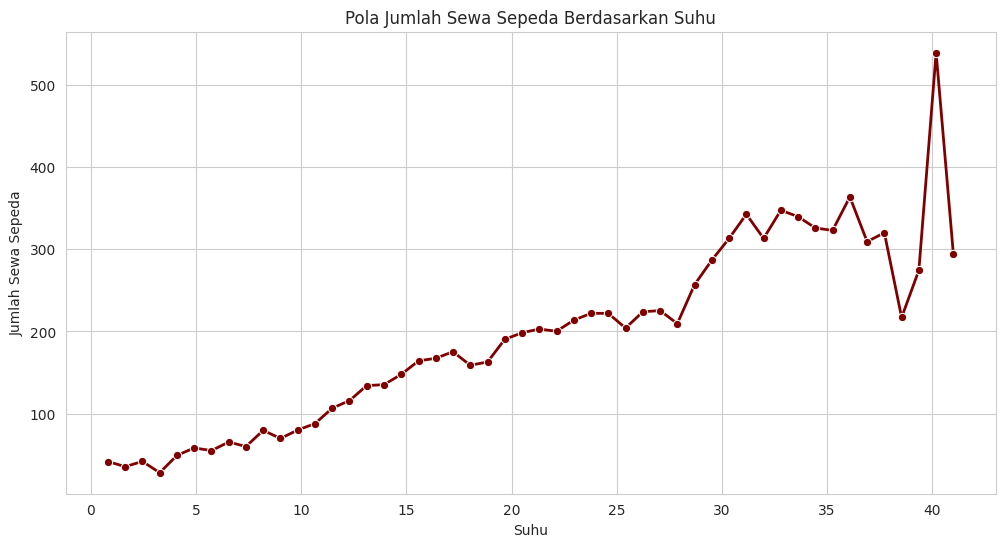

In [37]:
# Pola berdasarkan suhu
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="temperature", y="total_count", data=hour_df,marker= 'o', color= "Maroon",linewidth= 2, ci=None)
plt.title("Pola Jumlah Sewa Sepeda Berdasarkan Suhu")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

Rata-rata jumlah penyewaan sepeda memiliki peningkatan seiring meningkatnya suhu udara, jumlah penyewaan tertinggi pada saat suhu udara 48 derajat Celcius.

### Pertanyaan 2:

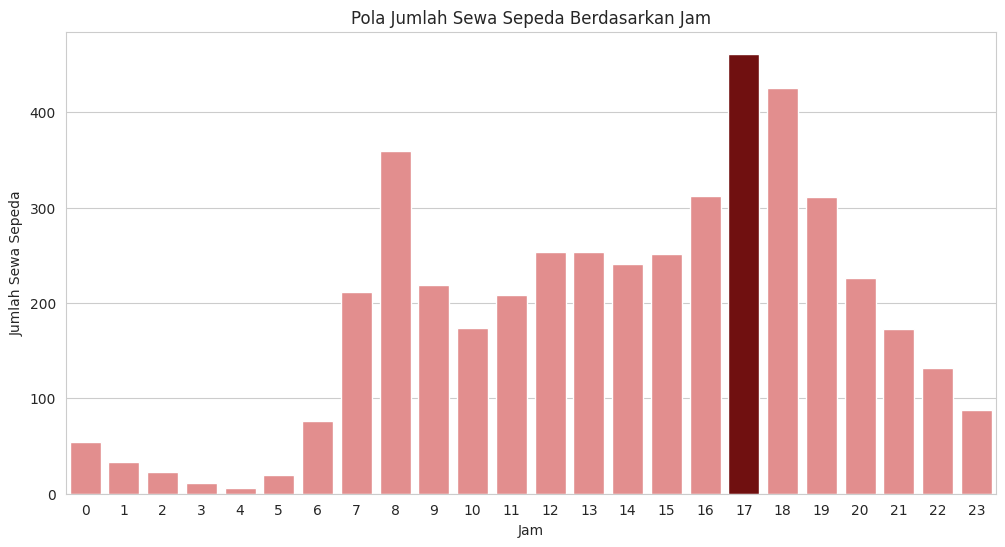

In [36]:
# Pola berdasarkan jam
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
colors = ["lightcoral","lightcoral","lightcoral", 
          "lightcoral","lightcoral","lightcoral",  
          "lightcoral","lightcoral","lightcoral",  
          "lightcoral","lightcoral","lightcoral",  
          "lightcoral","lightcoral","lightcoral",  
          "lightcoral","lightcoral", "maroon", 
          "lightcoral",  "lightcoral", "lightcoral",  
          "lightcoral","lightcoral","lightcoral"]
sns.barplot(x="hour", y="total_count", data=hour_df, ci=None, palette = colors )
plt.title("Pola Jumlah Sewa Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda")
plt.show()

Rata-rata penyewaan sepeda paling banyak terjadi pada jam 17 dan 18 atau jam 5 PM dan jam 6 PM. Paling sedikit penyewaan sepeda pada jam 4 AM

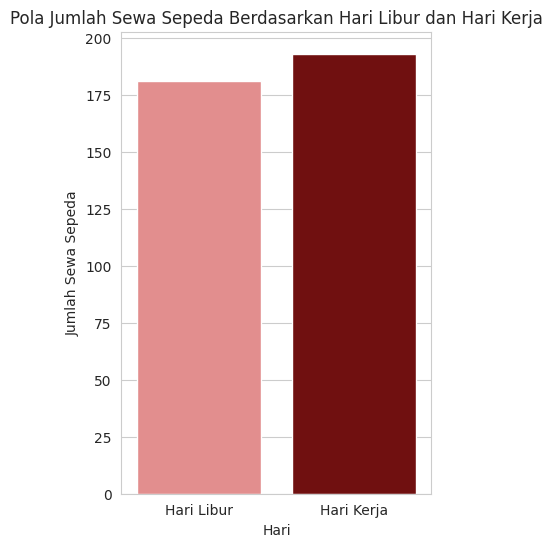

In [46]:
# Pola berdasarkan hari libur atau hari kerja
sns.set_style("whitegrid")
plt.figure(figsize=(4, 6))
colors = ["lightcoral", "maroon"]
sns.barplot(x="workingday", y="total_count", data=hour_df, ci=None, palette = colors )
plt.title("Pola Jumlah Sewa Sepeda Berdasarkan Hari Libur dan Hari Kerja")
plt.xlabel("Hari")
plt.ylabel("Jumlah Sewa Sepeda")
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])

plt.show()

Rata-rata penyewaan terjadi pada saat hari kerja (Senin - Jumat)

## Conclusion

- **Conclution pertanyaan 1:** Rata-rata jumlah penyewaan sepeda memiliki peningkatan seiring meningkatnya suhu udara, jumlah penyewaan tertinggi pada saat suhu udara 48 derajat Celcius.

- **Conclution pertanyaan 2:** Rata-rata penyewaan sepeda paling banyak terjadi pada jam 17 dan 18 atau jam 5 PM dan jam 6 PM. Paling sedikit penyewaan sepeda pada jam 4 AM

- **Conclution pertanyaan 3:** Rata-rata penyewaan terjadi pada saat hari kerja (Senin - Jumat)